#### Carregando a base de dados

In [2]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/base_census.pkl', mode = 'rb') as arquivo:
    x_previsores_treinamento, y_classes_treinamento, x_previsores_teste, y_classes_teste = pickle.load( arquivo )

In [3]:
x_previsores_treinamento.shape, y_classes_treinamento.shape

((27676, 108), (27676,))

In [4]:
x_previsores_teste.shape, y_classes_teste.shape

((4885, 108), (4885,))

#### Aplicação do aprendizado

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Instanciando o objeto do modelo e definindo que o algoritmo deve não deve gerar resultados diferentes a cada execução
arvore_de_decisao = DecisionTreeClassifier( criterion = 'entropy', random_state = 0 )

In [7]:
arvore_de_decisao.fit( x_previsores_treinamento, y_classes_treinamento )  # Ajustando o modelo

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
previsao = arvore_de_decisao.predict( x_previsores_teste )

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
print( f'Precisão do modelo: {accuracy_score( y_classes_teste, previsao ) * 100:.2f} %' )

Precisão do modelo: 81.04 %


#### Visualizando resultados do modelo

In [14]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from matplotlib.pyplot import xlabel, ylabel

#### Explicação do resultado

Nesta matriz, os valores são provenientes do cruzamento entre as previsões e os valores reais do conjunto de dados. Sendo assim, pode-se chegar à seguinte conclusão:


**Para a classe "<=50K", 3.227 previsões estão corretas e 466 estão incorretas.**

<br>

**Para a classe ">50K", 732 previsões estão corretas e 460 estão incorretas.**

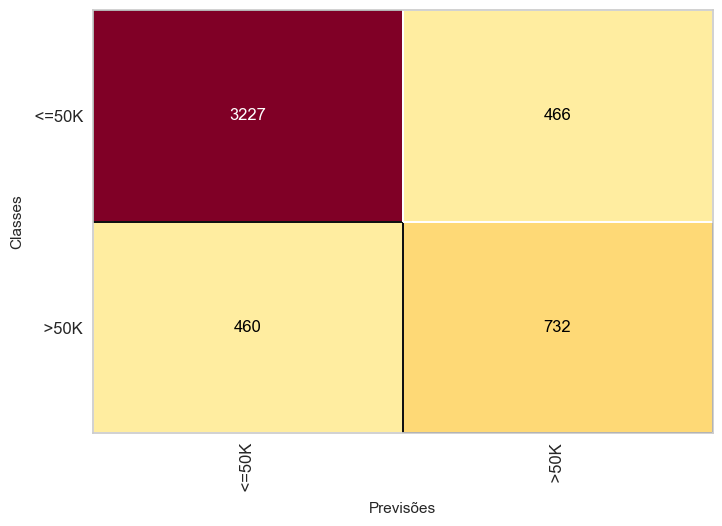

In [15]:
cm = ConfusionMatrix( arvore_de_decisao )
cm.fit( x_previsores_treinamento, y_classes_treinamento )
cm.score( x_previsores_teste, y_classes_teste )

xlabel('Previsões');
ylabel('Classes');

##### Gerando relatório de classificação

In [16]:
print(classification_report(
    y_classes_teste,  # y teste
    previsao
))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

